<img src="https://github.com/LucaScaldaferri/Curso_Cientista_de_Dados/blob/main/logo_ebac.png?raw=true" alt="ebac-logo">


---

# **Profissão Cientista de Dados**
## **Módulo** 7 | Árvores I | Exercício 2
Resolução Caderno de **Exercícios**<br> 
Aluno [Lucas Scaldaferri Magalhães Freitas](https://www.linkedin.com/in/0scaldaferri-lucas/) <br>

---

# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn import metrics 

%matplotlib inline

df = pd.read_csv('demo01_tratada.csv')
df.head()

,Unnamed: 0,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,0,1,1,1,1,58.832877,3.106849,1,0,0,0,2.0,False,1,1,1
1,1,0,2,1,2,1,52.356164,8.358904,1,0,1,1,1.0,False,0,0,1
2,2,0,1,2,1,1,46.224658,2.106849,1,1,1,1,2.0,False,1,1,1
3,3,0,1,3,1,1,29.230137,3.021918,1,0,0,0,2.0,False,0,1,0
4,4,0,1,1,1,1,27.482192,4.024658,1,0,1,0,2.0,False,0,0,1


In [24]:
y = df.mau
X = df.drop('mau', axis = 1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [26]:
# 2.1.

clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [27]:
# 2.2.

clf = clf.fit(X_train, y_train)

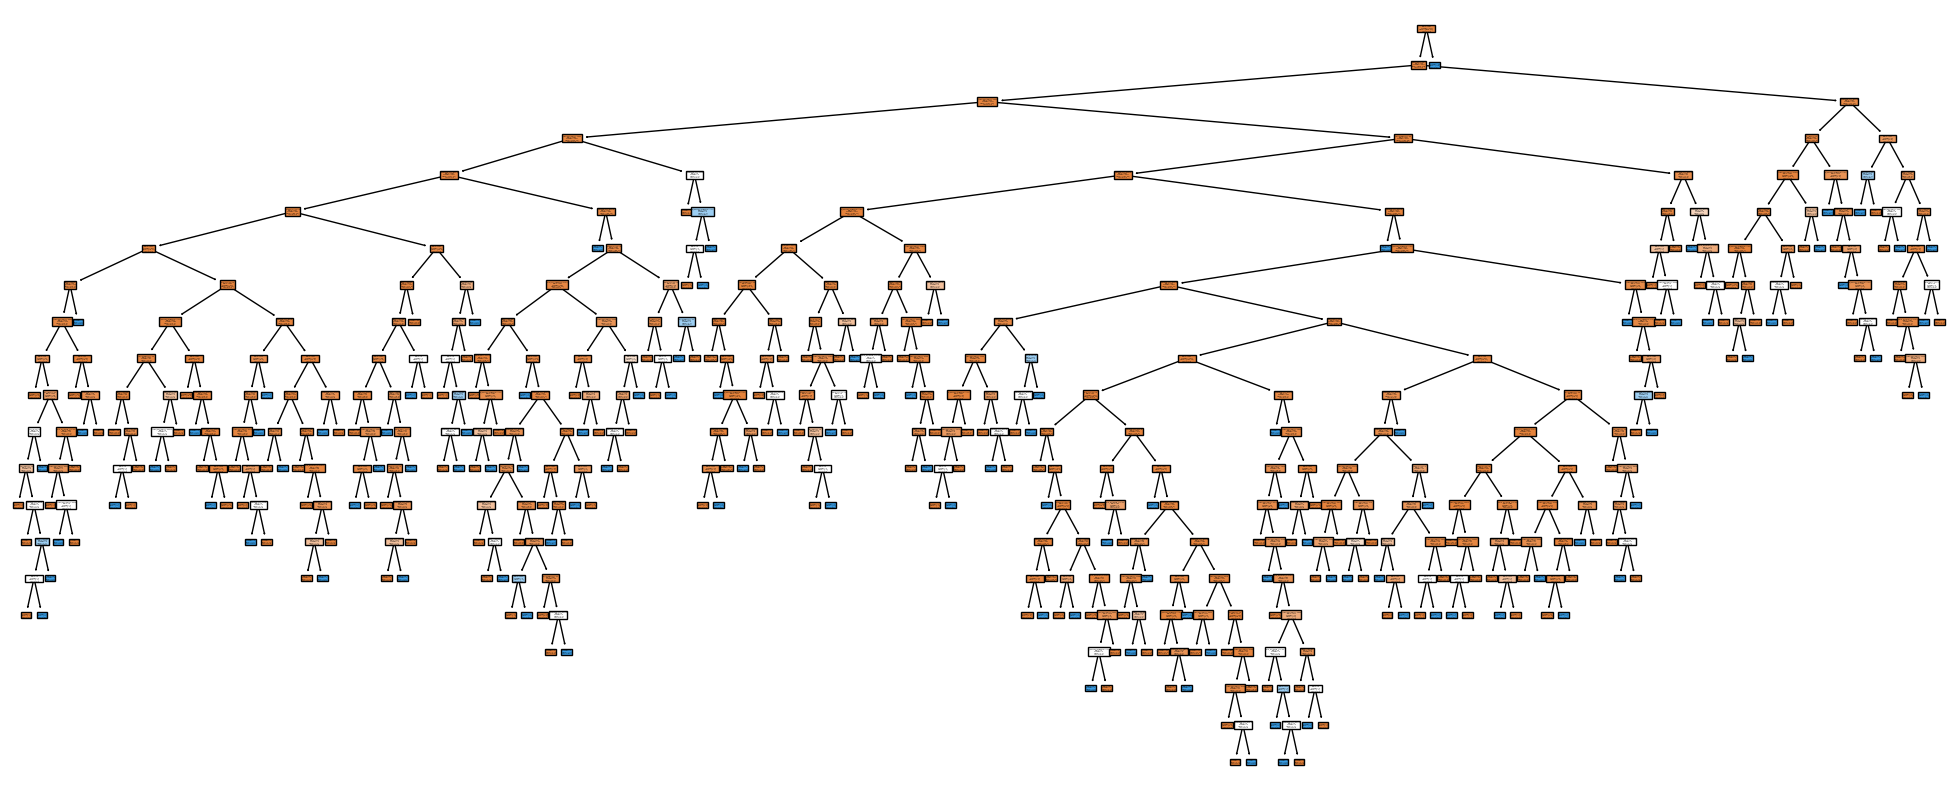

In [28]:
# 2.3.

plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Bom', 'Mau'],
          feature_names=X.columns);

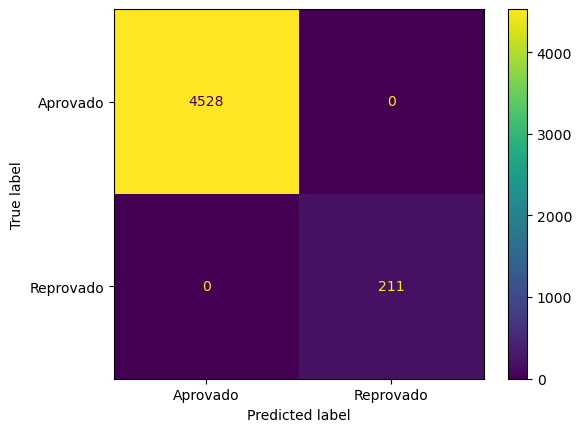

In [55]:
# 2.4.

ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels = ['Aprovado', 'Reprovado'])

In [79]:
# 2.5.

predict = clf.predict(X_train)
acuracia_treino = accuracy_score(y_train, predict)
acuracia_treino

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [91]:
# 3.1.

predict = clf.predict(X_test)
pd.Series(predict).value_counts()

False    1910
True      121
dtype: int64

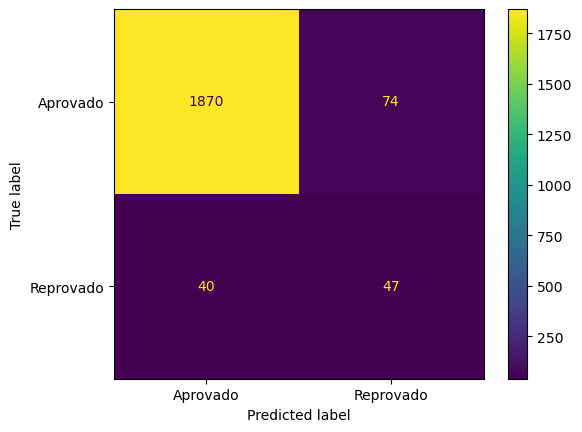

In [63]:
# 3.2.

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels = ['Aprovado', 'Reprovado'])

In [84]:
# 3.3.

predict = clf.predict(X_test)
acuracia_teste = accuracy_score(y_test, predict)
acuracia_teste

0.9438700147710487

In [85]:
# 3.4.

print(f'Treino: {acuracia_treino}\nTeste: {acuracia_teste}\nDiferença: {acuracia_treino - acuracia_teste}')

Treino: 1.0
Teste: 0.9438700147710487
Diferença: 0.056129985228951296


In [109]:
# 3.5.

classificado = y_test.replace(to_replace = True, value = False)
classificado.value_counts()

False    2031
Name: mau, dtype: int64

In [116]:
accuracy_score(y_test, y_pred = y_test.replace(to_replace=True, value=False))

0.9571639586410635